In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('F:\Download\iris.csv')

In [6]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [8]:
species=data["species"].tolist()
y=data["species"]

In [9]:
x=data.drop("species",1)

In [10]:
print(x[:5],)

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [11]:
print(y[:5])

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler().fit_transform(x)
x_scaled[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [13]:
import numpy as np
features=x_scaled.T
covMatrix=np.cov(features)


In [14]:
covMatrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [15]:
values,vectors=np.linalg.eig(covMatrix)
print(values,"\n")
print(vectors)

[2.93808505 0.9201649  0.14774182 0.02085386] 

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [16]:
explained_variance=[]
for i in range(len(values)):
    res=values[i]/np.sum(values)*100
    explained_variance.append(res)

In [17]:
print("variance of each feature",explained_variance)

variance of each feature [72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Dimensions')

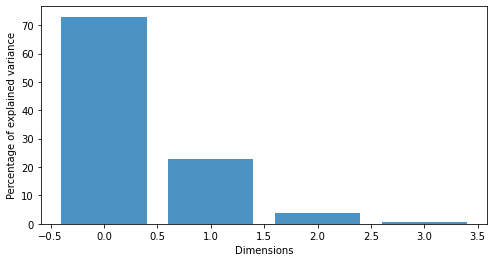

In [19]:
plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variance,alpha=0.8)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Dimensions")

In [20]:
plt.show()

In [21]:
pro_1=x_scaled.dot(vectors.T[0])
pro_2=x_scaled.dot(vectors.T[1])

result=pd.DataFrame(pro_1,columns=["PC1"])
result["PC2"]=pro_2
result["Y"]=y


In [22]:
result.head(10)

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1
5,-2.075631,-1.489178,1
6,-2.444029,-0.047644,1
7,-2.232847,-0.223148,1
8,-2.334640,1.115328,1
9,-2.184328,0.469014,1


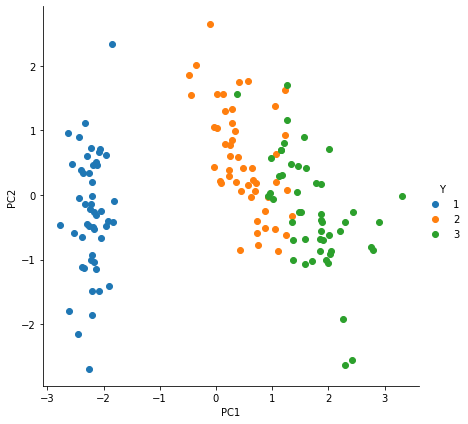

In [26]:
sns.FacetGrid(result,hue="Y",height=6).map(plt.scatter,'PC1','PC2').add_legend()

In [27]:
plt.show()